## Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

## About Dataset

Data Set Information:

The market historical data set of real estate valuation are collected from Sindian Dist., New Taipei City, Taiwan. The â€œreal estate valuation is a regression problem. The data set was randomly split into the training data set (2/3 samples) and the testing data set (1/3 samples).


Attribute Information:

The inputs are as follows
- X1 = the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
- X2 = the house age (unit: year)
- X3 = the distance to the nearest MRT station (unit: meter)
- X4 = the number of convenience stores in the living circle on foot (integer)
- X5 = the geographic coordinate, latitude. (unit: degree)
- X6 = the geographic coordinate, longitude. (unit: degree)

The output is as follow
Y= house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

Link to dataset: https://archive.ics.uci.edu/ml/datasets/Real+estate+valuation+data+set


### Reading the dataset

In [2]:
dataset = pd.read_excel('Real estate valuation data set.xlsx', names = ['transaction date',
                                                                         'house age',
                                                                         'distance to the nearest MRT station',
                                                                         'number of convenience stores',
                                                                         'latitude',
                                                                         'longitude',
                                                                         'house price of unit area'])

In [3]:
dataset.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


In [4]:
dataset.tail()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5
414,2013.500000,6.5,90.45606,9,24.97433,121.54310,63.9


## Preprocessing the dataset

In [5]:
dataset['transaction date'].unique()

array([2012.9166667, 2013.5833333, 2013.5      , 2012.8333333,
       2012.6666667, 2013.4166667, 2013.0833333, 2013.3333333,
       2013.25     , 2012.75     , 2013.       , 2013.1666667])

In above output as we can see, `2013.0833333` and `2012.8333333`, the *zero* seems to be a human error which needs to be handled.

In [6]:
dataset['transaction date'] = dataset['transaction date'].replace(2013.0833333, 2013.8333333)
dataset['transaction date'].unique()

array([2012.9166667, 2013.5833333, 2013.5      , 2012.8333333,
       2012.6666667, 2013.4166667, 2013.8333333, 2013.3333333,
       2013.25     , 2012.75     , 2013.       , 2013.1666667])

**Separating year and month to two different columns**

In [8]:
def get_transaction_month(x):
    x = int(str(x).split('.')[1]) * 12
    if x == 0:
        return 1
    x = math.ceil(x / 10)
    if int(str(x)[0]) > 1:
        return int(str(x)[0])
    else:
        return int(str(x)[:2])

In [9]:
# trial cases
print(get_transaction_month(2012.916667),
get_transaction_month(2012.833333),
get_transaction_month(2013.5833333),
get_transaction_month(2013.500000),
get_transaction_month(2012.6666667),
get_transaction_month(2013.4166667),
get_transaction_month(2013.250000),
get_transaction_month(2013.750000),
get_transaction_month(2013.000000),
get_transaction_month(2013.1666667))

11 10 7 6 8 5 3 9 1 2


In [10]:
dataset['year'] = dataset['transaction date'].apply(lambda x : str(x).split('.')[0])
dataset['month'] = dataset['transaction date'].apply(lambda x : get_transaction_month(x))

**Checking the dataset and for null values**

In [11]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 1 to 414
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   transaction date                     414 non-null    float64
 1   house age                            414 non-null    float64
 2   distance to the nearest MRT station  414 non-null    float64
 3   number of convenience stores         414 non-null    int64  
 4   latitude                             414 non-null    float64
 5   longitude                            414 non-null    float64
 6   house price of unit area             414 non-null    float64
 7   year                                 414 non-null    object 
 8   month                                414 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 32.3+ KB


In [12]:
dataset.head()

,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area,year,month
1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9,2012,11
2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2,2012,11
3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3,2013,7
4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8,2013,6
5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1,2012,10


In [13]:
dataset = dataset.iloc[:,[7,8,1,2,3,4,5,6]] #Rearranging the columns and removing 'transaction date'

In [14]:
dataset.head()

,year,month,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
1,2012,11,32.0,84.87882,10,24.98298,121.54024,37.9
2,2012,11,19.5,306.59470,9,24.98034,121.53951,42.2
3,2013,7,13.3,561.98450,5,24.98746,121.54391,47.3
4,2013,6,13.3,561.98450,5,24.98746,121.54391,54.8
5,2012,10,5.0,390.56840,5,24.97937,121.54245,43.1


### Dataframe to numpy for model training

In [15]:
X = dataset.iloc[:, :-1]
y = dataset['house price of unit area']

In [16]:
X.head()

,year,month,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
1,2012,11,32.0,84.87882,10,24.98298,121.54024
2,2012,11,19.5,306.59470,9,24.98034,121.53951
3,2013,7,13.3,561.98450,5,24.98746,121.54391
4,2013,6,13.3,561.98450,5,24.98746,121.54391
5,2012,10,5.0,390.56840,5,24.97937,121.54245


In [17]:
y.head()

1    37.9
2    42.2
3    47.3
4    54.8
5    43.1
Name: house price of unit area, dtype: float64

In [18]:
X = X.to_numpy(dtype=float)
y = y.to_numpy(dtype=float)

In [19]:
X

array([[2.0120000e+03, 1.1000000e+01, 3.2000000e+01, ..., 1.0000000e+01,
        2.4982980e+01, 1.2154024e+02],
       [2.0120000e+03, 1.1000000e+01, 1.9500000e+01, ..., 9.0000000e+00,
        2.4980340e+01, 1.2153951e+02],
       [2.0130000e+03, 7.0000000e+00, 1.3300000e+01, ..., 5.0000000e+00,
        2.4987460e+01, 1.2154391e+02],
       ...,
       [2.0130000e+03, 3.0000000e+00, 1.8800000e+01, ..., 7.0000000e+00,
        2.4979230e+01, 1.2153986e+02],
       [2.0130000e+03, 1.0000000e+00, 8.1000000e+00, ..., 5.0000000e+00,
        2.4966740e+01, 1.2154067e+02],
       [2.0130000e+03, 6.0000000e+00, 6.5000000e+00, ..., 9.0000000e+00,
        2.4974330e+01, 1.2154310e+02]])

In [20]:
y

array([ 37.9,  42.2,  47.3,  54.8,  43.1,  32.1,  40.3,  46.7,  18.8,
        22.1,  41.4,  58.1,  39.3,  23.8,  34.3,  50.5,  70.1,  37.4,
        42.3,  47.7,  29.3,  51.6,  24.6,  47.9,  38.8,  27. ,  56.2,
        33.6,  47. ,  57.1,  22.1,  25. ,  34.2,  49.3,  55.1,  27.3,
        22.9,  25.3,  47.7,  46.2,  15.9,  18.2,  34.7,  34.1,  53.9,
        38.3,  42. ,  61.5,  13.4,  13.2,  44.2,  20.7,  27. ,  38.9,
        51.7,  13.7,  41.9,  53.5,  22.6,  42.4,  21.3,  63.2,  27.7,
        55. ,  25.3,  44.3,  50.7,  56.8,  36.2,  42. ,  59. ,  40.8,
        36.3,  20. ,  54.4,  29.5,  36.8,  25.6,  29.8,  26.5,  40.3,
        36.8,  48.1,  17.7,  43.7,  50.8,  27. ,  18.3,  48. ,  25.3,
        45.4,  43.2,  21.8,  16.1,  41. ,  51.8,  59.5,  34.6,  51. ,
        62.2,  38.2,  32.9,  54.4,  45.7,  30.5,  71. ,  47.1,  26.6,
        34.1,  28.4,  51.6,  39.4,  23.1,   7.6,  53.3,  46.4,  12.2,
        13. ,  30.6,  59.6,  31.3,  48. ,  32.5,  45.5,  57.4,  48.6,
        62.9,  55. ,

**Normalizing the dataset**

In [21]:
X = X / np.linalg.norm(X)
y = y / np.linalg.norm(y)

In [22]:
X

array([[3.78350174e-02, 2.06851487e-04, 6.01749780e-04, ...,
        1.88046806e-04, 4.69796960e-04, 2.28552540e-03],
       [3.78350174e-02, 2.06851487e-04, 3.66691272e-04, ...,
        1.69242126e-04, 4.69747316e-04, 2.28551167e-03],
       [3.78538221e-02, 1.31632764e-04, 2.50102252e-04, ...,
        9.40234032e-05, 4.69881205e-04, 2.28559441e-03],
       ...,
       [3.78538221e-02, 5.64140419e-05, 3.53527996e-04, ...,
        1.31632764e-04, 4.69726443e-04, 2.28551825e-03],
       [3.78538221e-02, 1.88046806e-05, 1.52317913e-04, ...,
        9.40234032e-05, 4.69491572e-04, 2.28553348e-03],
       [3.78538221e-02, 1.12828084e-04, 1.22230424e-04, ...,
        1.69242126e-04, 4.69634300e-04, 2.28557918e-03]])

In [23]:
y

array([0.04617646, 0.05141548, 0.0576292 , 0.06676702, 0.05251202,
       0.03910988, 0.04910057, 0.05689817, 0.02290547, 0.02692612,
       0.05044078, 0.07078766, 0.04788219, 0.02899736, 0.04179031,
       0.061528  , 0.08540818, 0.04556727, 0.05153732, 0.05811655,
       0.03569843, 0.06286822, 0.02997206, 0.05836022, 0.047273  ,
       0.03289616, 0.06847275, 0.04093744, 0.05726369, 0.06956929,
       0.02692612, 0.03045941, 0.04166847, 0.06006595, 0.06713253,
       0.03326167, 0.02790082, 0.03082492, 0.05811655, 0.05628899,
       0.01937218, 0.02217445, 0.04227766, 0.04154663, 0.06567048,
       0.04666381, 0.0511718 , 0.07493014, 0.01632624, 0.01608257,
       0.05385223, 0.02522039, 0.03289616, 0.04739484, 0.06299005,
       0.01669176, 0.05104997, 0.06518313, 0.0275353 , 0.05165916,
       0.02595142, 0.07700138, 0.03374902, 0.0670107 , 0.03082492,
       0.05397407, 0.06177168, 0.06920377, 0.04410522, 0.0511718 ,
       0.0718842 , 0.04970975, 0.04422706, 0.02436753, 0.06627

## MLP - BP and SDGM

In [24]:
class MLP_regressor(object):
    def __init__(self):
        # parameters
        self.inputSize = 7 # number of input attributes or features
        self.hiddenSize_1 = 10
        self.hiddenSize_2 = 5
        self.outputSize = 1
        
        # weights
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize_1) # (7x10) weight matrix from input to hidden layer 1
        self.W2 = np.random.randn(self.hiddenSize_1, self.hiddenSize_2) # (10x5) weight matrix from hidden layer 1 to hidden layer 2
        self.W3 = np.random.randn(self.hiddenSize_2, self.outputSize) # (5x1) weight matrix from hidden layer2 to output layer
        
        # old values
        self.delta_OW1 = np.zeros((self.inputSize, self.hiddenSize_1))
        self.delta_OW2 = np.zeros((self.hiddenSize_1, self.hiddenSize_2))
        self.delta_OW3 = np.zeros((self.hiddenSize_2, self.outputSize))
        
        # momentum
        self.alpha = 0.9
        # Learning rate
        self.eta1 = 0.1
        self.eta2 = 0.1
        self.eta3 = 0.1
        
        
    def feedForward(self, X):
        #forward propogation through the network
        self.z = np.dot(X, self.W1) #dot product of X (input) and first set of weights (7x10)
        self.z2 = self.sigmoid(self.z) #activation function
        
        self.z3 = np.dot(self.z2, self.W2) #dot product of hidden layer (z2) and second set of weights (10x5)
        self.z4 = self.sigmoid(self.z3) #activation function
        
        self.z5 = np.dot(self.z4, self.W3) #dot product of hidden layer (z4) and third set of weights (5x1)
        
        output = self.sigmoid(self.z5)
        return output
        
    def sigmoid(self, s, deriv=False):
        if (deriv == True):
            return s * (1 - s) # derivation of sigmoid function
        return 1/(1 + np.exp(-s))
    
    def backward(self, X, y, output):
        # backward propogate through the network
        
        self.output_error = y - output # error in output
        self.output_delta = self.output_error * self.sigmoid(output, deriv=True)
        
        self.z4_error = self.z4.T.dot(self.output_delta) #z4 error: how much our hidden layer weights contribute to output error
        self.z4_delta = self.z4_error.dot(self.sigmoid(self.z4, deriv=True)) #applying derivative of sigmoid to z4 error
        
        self.z2_error = self.z2.T.dot(self.output_delta) #z2 error: how much our hidden layer weights contribute to output error
        self.z2_delta = self.z2_error.dot(self.sigmoid(self.z2, deriv=True)) #applying derivative of sigmoid to z2 error
        
        # SDGM
        self.delta_W1 = self.eta1 * self.z2_delta.dot(self.z2.T)
        self.delta_W2 = self.eta2 * self.z4_delta.dot(self.z4.T)
        self.delta_W3 = self.eta3 * self.output_delta.dot(output)
        
        self.delta_W1.resize(self.W1.shape)
        self.delta_W2.resize(self.W2.shape)
        self.delta_W3.resize(self.W3.shape)
        
        # Updating the weights
        W1_temp = self.W1 + self.alpha * self.delta_OW1 + self.delta_W1
        W2_temp = self.W2 + self.alpha * self.delta_OW2 + self.delta_W2
        W3_temp = self.W3 + self.alpha * self.delta_OW3 + self.delta_W3
        
        self.delta_OW1 = self.delta_W1
        self.delta_OW2 = self.delta_W2
        self.delta_OW3 = self.delta_W3
        
        self.W1 = W1_temp
        self.W2 = W2_temp
        self.W3 = W3_temp
        
    def train(self, X, y):
        # Feed forward
        output = self.feedForward(X)
        # Back Propagation with SDGM
        self.backward(X, y, output)
        

In [25]:
NN = MLP_regressor() # Class object

## Training the model

In [26]:
num_Epoch = 1000 # number of epochs
epoch = 1 # counter variable
mse_thres = 1e-3 # Threshold for mean square error
mse_train = float('inf') # initializing MSE as infinity
training_mse_error = [] # saving MSE for each epoch

while mse_train > mse_thres and epoch <= num_Epoch:
    # Shuffling the dataset before each epoch
    p = np.random.permutation(X.shape[0])
    X = X[p]
    y = y[p]
    for i in range(0,X.shape[0]): # number of iterations in each epoch will be equal to number of samples
        NN.train(X[:i], y[:i]) # input in batches
    if epoch % 120 == 0: # after every 120 epochs, decreasing the learning and making momentum more closer to one
        print('Completed', epoch, 'epochs')
        NN.eta1 = NN.eta1/10
        NN.eta2 = NN.eta2/10
        NN.eta3 = NN.eta3/10
        NN.alpha = 0.9 + NN.alpha/10
        print("Loss: " + str(mse_train)) # Printing loss after every 120 epochs
    mse_train = np.mean(np.square(y[:i] - NN.feedForward(X[:i]))) # calculare MSE after each epoch
    training_mse_error.append(mse_train) # saving MSE
    epoch += 1
    
print("Loss: " + str(mse_train))

C:\Users\Dell\AppData\Local\Temp/ipykernel_12436/2801137036.py:41: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-s))


Completed 120 epochs
Loss: 0.010971438946515253
Completed 240 epochs
Loss: 0.010085608705416825
Completed 360 epochs
Loss: 0.010003394148459695
Completed 480 epochs
Loss: 0.009993633835175477
Completed 600 epochs
Loss: 0.009994319637059372
Completed 720 epochs
Loss: 0.009994296300350805
Completed 840 epochs
Loss: 0.009993484676460853
Completed 960 epochs
Loss: 0.009993483849531882
Loss: 0.00999349470994776


## Learning Curve

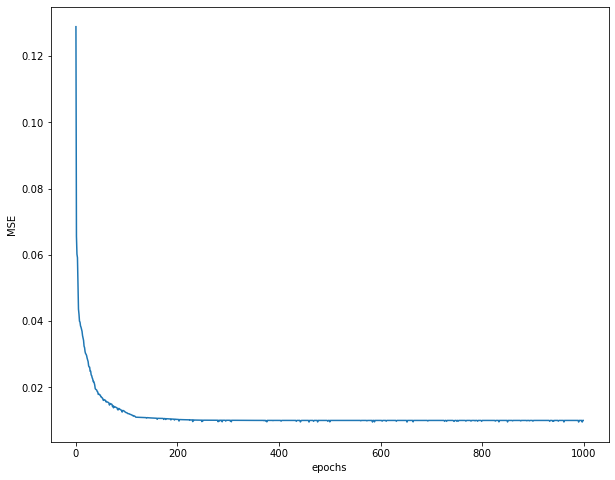

In [28]:
plt.figure(figsize=(10,8))
plt.plot([i for i in range(num_Epoch)], training_mse_error)
plt.xlabel("epochs")
plt.ylabel("MSE")
plt.show()